In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

Load Datasets

In [2]:
zoo = pd.read_csv("zoo.csv")
classdf = pd.read_csv("class.csv")

Basic Data Analyses

Zoo Dataset

In [3]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo.shape

(101, 18)

In [5]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
zoo.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [7]:
zoo.duplicated().sum()

np.int64(0)

Class Dataset

In [8]:
classdf

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [9]:
classdf.shape

(7, 4)

In [10]:
classdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [11]:
classdf.isnull().sum()

Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64

In [12]:
classdf.duplicated().sum()

np.int64(0)

Exploratory Data Analyses - EDA

In [13]:
print("Animals in each class:")
for i, row in classdf.iterrows():
    animal_list = row['Animal_Names'].split(', ')
    print(f"Class {row['Class_Number']} - {row['Class_Type']} - {animal_list[:]}")

Animals in each class:
Class 1 - Mammal - ['aardvark', 'antelope', 'bear', 'boar', 'buffalo', 'calf', 'cavy', 'cheetah', 'deer', 'dolphin', 'elephant', 'fruitbat', 'giraffe', 'girl', 'goat', 'gorilla', 'hamster', 'hare', 'leopard', 'lion', 'lynx', 'mink', 'mole', 'mongoose', 'opossum', 'oryx', 'platypus', 'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer', 'seal', 'sealion', 'squirrel', 'vampire', 'vole', 'wallaby', 'wolf']
Class 2 - Bird - ['chicken', 'crow', 'dove', 'duck', 'flamingo', 'gull', 'hawk', 'kiwi', 'lark', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'rhea', 'skimmer', 'skua', 'sparrow', 'swan', 'vulture', 'wren']
Class 3 - Reptile - ['pitviper', 'seasnake', 'slowworm', 'tortoise', 'tuatara']
Class 4 - Fish - ['bass', 'carp', 'catfish', 'chub', 'dogfish', 'haddock', 'herring', 'pike', 'piranha', 'seahorse', 'sole', 'stingray', 'tuna']
Class 5 - Amphibian - ['frog', 'frog', 'newt', 'toad']
Class 6 - Bug - ['flea', 'gnat', 'honeybee', 'housefly', 'lady

In [14]:
class_map = dict(zip(classdf["Class_Number"], classdf["Class_Type"]))
zoo['class_name'] = zoo['class_type'].map(class_map)
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,class_name
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal


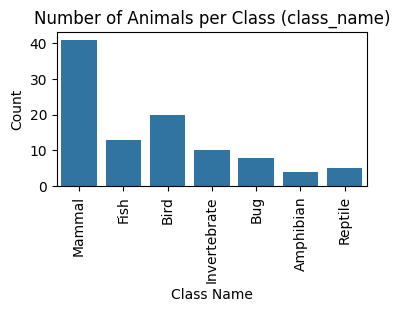

In [15]:
plt.figure(figsize=(4,2))
sns.countplot(x='class_name', data=zoo)
plt.title('Number of Animals per Class (class_name)')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [16]:
for col in zoo.columns[1:17]:
    print(f"{col}: {zoo[col].unique()}")

hair: [1 0]
feathers: [0 1]
eggs: [0 1]
milk: [1 0]
airborne: [0 1]
aquatic: [0 1]
predator: [1 0]
toothed: [1 0]
backbone: [1 0]
breathes: [1 0]
venomous: [0 1]
fins: [0 1]
legs: [4 0 2 6 8 5]
tail: [0 1]
domestic: [0 1]
catsize: [1 0]


In [17]:
print(zoo['legs'].value_counts())

legs
4    38
2    27
0    23
6    10
8     2
5     1
Name: count, dtype: int64


In [18]:
zoo[zoo['legs'] == 5][['animal_name', 'legs', 'class_name']]

,animal_name,legs,class_name
85,starfish,5,Invertebrate


In [19]:
print("Skew of legs:",zoo['legs'].skew())

Skew of legs: 0.13942710182441184


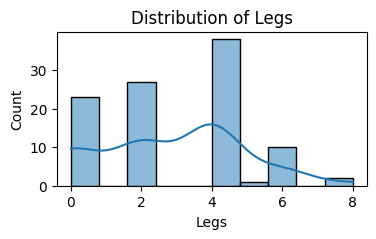

In [20]:
plt.figure(figsize=(4,2))
sns.histplot(zoo['legs'], bins=10, kde=True)
plt.title('Distribution of Legs')
plt.xlabel('Legs')
plt.ylabel('Count')
plt.show()

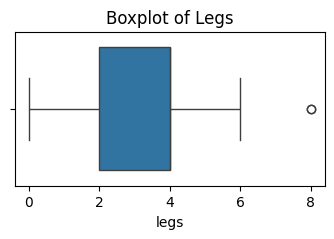

In [21]:
plt.figure(figsize=(4,2))
sns.boxplot(x=zoo['legs'])
plt.title('Boxplot of Legs')
plt.show()

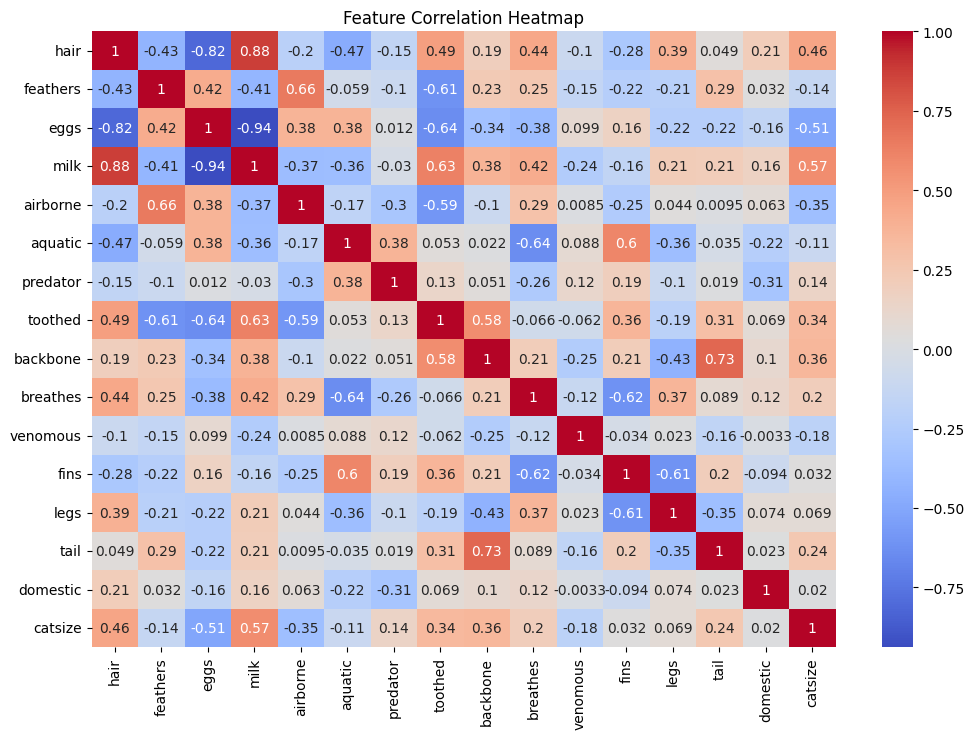

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(zoo.drop(columns=['animal_name','class_type','class_name']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

Feature selection

In [23]:
X = zoo.drop(columns=['animal_name', 'class_type', 'class_name'])  # Keep only physical traits
y = zoo['class_type']  # Target

Train-test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Feature scaling

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Find best k using 5-fold CV

In [26]:
k_range = range(1, 21)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_range[np.argmax(cv_scores)]
print(f"Best k: {best_k}")
print(f"Best CV Score: {max(cv_scores):.4f}")

Best k: 3
Best CV Score: 0.9368


Train final model with best k

In [27]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Predict on test set

In [28]:
y_pred = knn_final.predict(X_test_scaled)

Test accuracy

In [29]:
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 1.0000


Confusion matrix

In [30]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


Confusion matrix heatmap

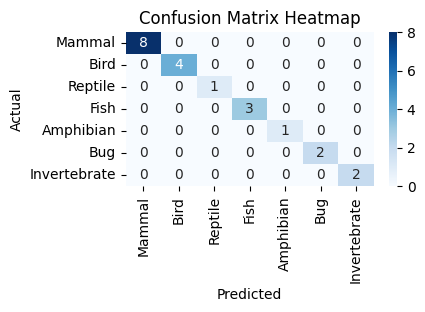

In [31]:
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_map.values(), yticklabels=class_map.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [32]:
summary = pd.DataFrame({
    "Metric": ["Best k", "Best CV Score", "Test Accuracy"],
    "Value": [best_k, round(max(cv_scores), 4), round(accuracy_score(y_test, y_pred), 4)]
})

print(summary)

          Metric   Value
0         Best k  3.0000
1  Best CV Score  0.9368
2  Test Accuracy  1.0000


Save Trained KNN Model using Pickle

In [33]:
import pickle

with open("knn_zoo_model.pkl", "wb") as f:
    pickle.dump({"model": knn_final, "scaler": scaler}, f)